<a href="https://colab.research.google.com/github/kenneth-nguyenn/02_ADS_Project/blob/1712727/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Đồ án: Khoa học Dữ liệu và Ứng dụng

## Thông tin chung:
### Giảng viên: 
- Trần Trung Kiên
- Nguyễn Thái Vũ

### Thông tin nhóm:
1. STT: Nhóm 02
2. Thành viên:

| STT | MSSV | Họ tên | Github |
| --- | --- | --- | --- |
| 1 | 1712727 | Nguyễn Hoàng Sơn | [hsjune29th](https://github.com/hsjune29th) |
| 2 | 1712258 | Nguyễn Văn Hậu | [kenneth-nguyenn](https://github.com/kenneth-nguyenn) |
| 3 | 1712888 | Nguyễn Đình Tuyên | [Tuyen177](https://github.com/Tuyen177) |

3. Phân công công việc:
- [Google Sheet](https://docs.google.com/spreadsheets/d/1eKbhc6rpNsDoBfTC8SfAnlKiw_y3_OvHUefUuxQw8BI/edit#gid=621371829)

## 1. Mô tả bài toán:

- **Tên cuộc thi:** [Google Brain - Ventilator Pressure Prediction](https://www.kaggle.com/competitions/ventilator-pressure-prediction/data?select=test.csv)
- **Mô tả:** Được tổ chức bởi Google Brain vào 04/11/2021 với hơn 2,605 nhóm tham dự.
- **Input:** Tập dữ liệu được thu thập từ máy thở cung cấp khí oxy cho phổi.
- **Output:** Dự đoán áp lực trên đường thở (pressure).
- **Độ đo:**
    + Cuộc thi sẽ được tính điểm là trung bình sai số tuyệt đối giữa áp suất dự đoán và áp suất thực tế trong giai đoạn hít thở của mỗi nhịp thở.
    + Công thức: $$|X-Y|$$
- **Ý nghĩa thực tiễn của ứng dụng:**
    + Thở máy là một biện pháp chuyên sâu của bác sĩ lâm sàng, dưới sự khẩn thiết của đại dịch COVID-19 trên diện rộng đã chỉ ra điểm hạn chế của việc sử sụng phương pháp thở máy này. Việc phát triển các phương pháp mới để điều khiển máy thở cơ học rất tốn kém, gặp khó khăn khi thử nghiệm lâm sàng.
    + Bài toán này cũng là tiền đề cho các thuật toán thích ứng với bệnh nhân, giúp giảm bớt gánh nặng cho bác sĩ lâm sàng trong tình hình mới. Do đó, các phương pháp điều trị bằng máy thở có thể được phổ biến rộng rãi hơn để giúp bệnh nhân thở được.

## 2. Giải pháp của bài toán:

### 2.1. Ý tưởng:

- Nhóm quyết định tìm hiểu và cài đặt giải pháp **"[The inverse of a PID controller](https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/285283)"**, giải pháp đứng vị thứ hai trong leaderboard.
- Qúa trình hoàn thành cuộc thi, nhóm tác giả thực hiện ba giai đoạn chính:
    + Sử dụng 7 model được share từ @dlaststark ([notebook](https://www.kaggle.com/code/dlaststark/gb-vpp-pulp-fiction/notebook)). Trong notebook này, tác giả trên tập trung vào `Feature Engineering` và xây dựng `
Keras DNN Model` trên TPU.
    + Tiếp theo, tác gỉa tập hợp các dự đoán của 7 model trên bằng cách kết hợp diểm mạnh của giá trị median và mean [tại đây](https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/282735).
    + Cuối cùng, tác giả cố gắng xác định hàm nghịch đảo của PID controller (tìm nghịch đảo của bộ điều khiển P và sau đó chuyển sang bộ điều khiển PI) để dự đoán áp suất, được thảo luận [tại đây](https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/285283).

### 2.2. Lý do lựa chọn:

- Giải pháp đứng vị thứ hai, nằm trong trong TOP-10 leaderboard.
- Hầu hết, các giải pháp đứng trong TOP đầu của leaderboard đều sử dụng đến **PID controller** để giải quyết bài toán này. Mặt khác, trong quá trình đọc phần notebook cũng như giải thích của tác giả, nhóm em cảm thấy dễ hiểu và nắm được cơ bản quá trình xử lý trong notebook.

### 2.3. Phương pháp thu thập dữ liệu:

- Dữ liệu được sử dụng trong cuộc thi này được tạo ra bằng cách sử dụng một máy thở đã kết nối với phổi kiểm tra ống thổi nhân tạo thông qua một mạch hô hấp.
- Sơ đồ cách thiết lập như sau: 
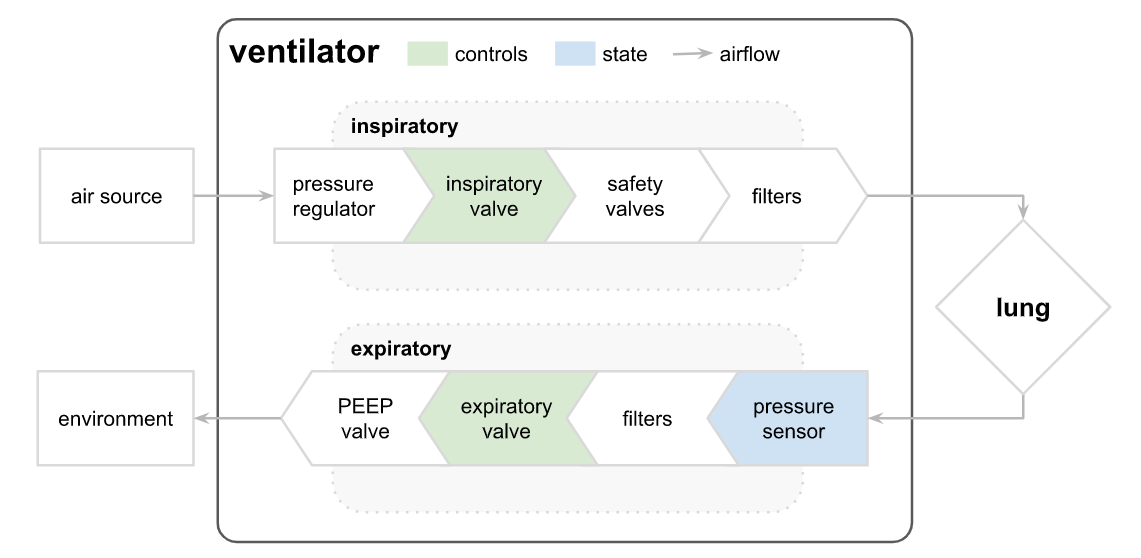

Hai đầu vào điều khiển được đánh dấu màu xanh lá cây: 
- Inspiratory valve : biến liên tục [0:100] đại diện cho tỷ lệ phần trăm van điện tử của máy thở được mở để cho không khí vào phổi.
- Expiratory valve: biến nhị phân (0,1) đại diện cho van thăm dò đang  (1) hoặc đóng (0) để thoát khí ra ngoài.

Trong cuộc thi này, những người tham gia được cung cấp nhiều chuỗi thời gian thở và sẽ học cách dự đoán áp lực đường thở trong mạch hô hấp trong quá trình thở dựa trên chuỗi thời gian của đầu vào kiểm soát.

Mỗi chuỗi thời gian đại diện cho một nhịp thở khoảng 3 giây. Các tệp được sắp xếp sao cho mỗi hàng là một bước thời gian trong hơi thở và đưa ra hai tín hiệu điều khiển, kết quả là áp lực đường thở và các thuộc tính liên quan của phổi.

### 2.4. Mô tả về các cột dữ liệu:

- `id`: mã định danh của 1 bước thở trên toàn bộ tệp.
- `breath_id`: mã định danh của 1 nhịp thở trên toàn bộ tệp.
- `R`: thuộc tính phổi cho biết mức độ hạn chế của đường thở.
- `C`: thuộc tính phổi cho biết mức độ tuân thủ của phổi.
- `time_step`: dấu thời gian thực tế.
- `u_in`: đầu vào điều khiển cho van điện tử [0:100].
- `u_out`: đầu vào điều khiển cho van thăm dò (0,1).
- `pressure`: áp lực đường thở đo trong mạch hô hấp.

## 3. Giải quyết bài toán:

### Import libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import pickle
from IPython.display import display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 3.1. Đọc dữ liệu:

In [ ]:
train_df = pd.read_csv("/content/train.csv")
print(f"train_df: {train_df.shape}")
train_df.head()

train_df: (6036000, 8)


,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [ ]:
test_df = pd.read_csv('/content/test.csv')
print(f"test_df: {test_df.shape}")
test_df.head()

test_df: (4024000, 7)


,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0


### 3.2. Feature Engineer:

Quá trình Feature Engineer chia làm 8 bước được mô tả chi tiết như bên dưới. Sau quá trình phân tích, tất cả các quá trình được thực hiện trong một hàm duy nhất là `add_features` với input là một dataframe với 7 features và ouput là một dataframe có 71 features.

In [ ]:
def add_features(df):
    
    # Step 1:
    # Tính tích chéo của u_in và u_out
    df['cross']= df['u_in'] * df['u_out']
    # Tính tích chéo của time_step và u_out
    df['cross2']= df['time_step'] * df['u_out']
    # Tính tổng tích lũy của mỗi phổi lượng khí u_in nhân với khoảng thời gian time_step
    df['area'] = df['time_step'] * df['u_in']
    df['area'] = df.groupby('breath_id')['area'].cumsum()
    # Tính tổng tích lũy khoảng thời gian của mỗi phổi
    df['time_step_cumsum'] = df.groupby(['breath_id'])['time_step'].cumsum()
    # Tính tổng tích lũy lượng khí u_in của mỗi phổi
    df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
    print("Step-1...Completed")
    
    # Step 2:
    # Ý tưởng phần này là dịch chuyển u_in và u_out tăng/giảm theo từng phổi.
    df['u_in_lag1'] = df.groupby('breath_id')['u_in'].shift(1)
    df['u_out_lag1'] = df.groupby('breath_id')['u_out'].shift(1)
    df['u_in_lag_back1'] = df.groupby('breath_id')['u_in'].shift(-1)
    df['u_out_lag_back1'] = df.groupby('breath_id')['u_out'].shift(-1)
    df['u_in_lag2'] = df.groupby('breath_id')['u_in'].shift(2)
    df['u_out_lag2'] = df.groupby('breath_id')['u_out'].shift(2)
    df['u_in_lag_back2'] = df.groupby('breath_id')['u_in'].shift(-2)
    df['u_out_lag_back2'] = df.groupby('breath_id')['u_out'].shift(-2)
    df['u_in_lag3'] = df.groupby('breath_id')['u_in'].shift(3)
    df['u_out_lag3'] = df.groupby('breath_id')['u_out'].shift(3)
    df['u_in_lag_back3'] = df.groupby('breath_id')['u_in'].shift(-3)
    df['u_out_lag_back3'] = df.groupby('breath_id')['u_out'].shift(-3)
    df['u_in_lag4'] = df.groupby('breath_id')['u_in'].shift(4)
    df['u_out_lag4'] = df.groupby('breath_id')['u_out'].shift(4)
    df['u_in_lag_back4'] = df.groupby('breath_id')['u_in'].shift(-4)
    df['u_out_lag_back4'] = df.groupby('breath_id')['u_out'].shift(-4)
    df = df.fillna(0)
    print("Step-2...Completed")
    
    # step 3:
    # Lượng khi lớn nhất ứng với mỗi phổi.
    df['breath_id__u_in__max'] = df.groupby(['breath_id'])['u_in'].transform('max')
    # Lượng khi trung bình ứng với mỗi phổi.
    df['breath_id__u_in__mean'] = df.groupby(['breath_id'])['u_in'].transform('mean')
    # Khoảng cách giữa u_in và lượng khí lớn nhất của mỗi phổi
    df['breath_id__u_in__diffmax'] = df.groupby(
        ['breath_id'])['u_in'].transform('max') - df['u_in']
    # Khoảng cách giữa u_in và lượng khí trung bình của mỗi phổi
    df['breath_id__u_in__diffmean'] = df.groupby(
        ['breath_id'])['u_in'].transform('mean') - df['u_in']
    print("Step-3...Completed")
    
    # Step 4:
    # sự thay đổi u_in so với 1 lần đo trước đó
    df['u_in_diff1'] = df['u_in'] - df['u_in_lag1']
    # sự thay đổi u_out so với 1 lần đo trước đó
    df['u_out_diff1'] = df['u_out'] - df['u_out_lag1']
    # sự thay đổi u_in so với 2 lần đo trước đó
    df['u_in_diff2'] = df['u_in'] - df['u_in_lag2']
    # sự thay đổi u_out  so với 2 lần đo trước đó
    df['u_out_diff2'] = df['u_out'] - df['u_out_lag2']
    # sự thay đổi u_in so với 3 lần đo trước đó
    df['u_in_diff3'] = df['u_in'] - df['u_in_lag3']
    # sự thay đổi u_out so với 3 lần đo trước đó
    df['u_out_diff3'] = df['u_out'] - df['u_out_lag3']
    # sự thay đổi u_in so với 4 lần đo trước đó
    df['u_in_diff4'] = df['u_in'] - df['u_in_lag4']
    # sự thay đổi u_out so với 4 lần đo trước đó
    df['u_out_diff4'] = df['u_out'] - df['u_out_lag4']
    print("Step-4...Completed")
    
    # Step 5:
    # giá trị trung bình của u_in từ lần đo đầu tiên cho đến hiện tại
    df['one'] = 1
    df['count'] = (df['one']).groupby(df['breath_id']).cumsum()
    df['u_in_cummean'] =df['u_in_cumsum'] /df['count']
    df['breath_id_lag']=df['breath_id'].shift(1).fillna(0)
    df['breath_id_lag2']=df['breath_id'].shift(2).fillna(0)
    # breath_id hiện tại có là breath_id của lần đo trước đó?
    df['breath_id_lagsame']=np.select([df['breath_id_lag']==df['breath_id']],[1],0)
    # breath_id hiện tại có là breath_id của 2 lần đo trước đó?
    df['breath_id_lag2same']=np.select([df['breath_id_lag2']==df['breath_id']],[1],0)
    df['breath_id__u_in_lag'] = df['u_in'].shift(1).fillna(0)
    # nếu breath_id trùng với lần đo trước, tạo cột có giá trị bằng u_in trước đó
    df['breath_id__u_in_lag'] = df['breath_id__u_in_lag'] * df['breath_id_lagsame']
    df['breath_id__u_in_lag2'] = df['u_in'].shift(2).fillna(0)
    # nếu breath_id trùng với 2 lần đo trước, tạo cột có giá trị bằng u_in 2 lần đo trước đó
    df['breath_id__u_in_lag2'] = df['breath_id__u_in_lag2'] * df['breath_id_lag2same']
    print("Step-5...Completed")
    
    # Step 6:
    # sự thay đổi time_step so với lần đo trước
    df['time_step_diff'] = df.groupby('breath_id')['time_step'].diff().fillna(0)
    # tính trung bình cộng có trong số của u_in
    df['ewm_u_in_mean'] = (df\
                           .groupby('breath_id')['u_in']\
                           .ewm(halflife=9)\
                           .mean()\
                           .reset_index(level=0,drop=True))
    # thêm các cột: sum, min, max, mean là tổng , GTNN, GTLN, TB từ lần đo đầu tiên đến lần đó đang xét
    df[["15_in_sum","15_in_min","15_in_max","15_in_mean"]] = (df\
                                                              .groupby('breath_id')['u_in']\
                                                              .rolling(window=15,min_periods=1)\
                                                              .agg({"15_in_sum":"sum",
                                                                    "15_in_min":"min",
                                                                    "15_in_max":"max",
                                                                    "15_in_mean":"mean"})\
                                                               .reset_index(level=0,drop=True))
    print("Step-6...Completed")
    
    # Step 07:
    #sự thay đổi của u_in so với 1 lần đo _lag trước đó
    df['u_in_lagback_diff1'] = df['u_in'] - df['u_in_lag_back1']
    #sự thay đổi của u_out so với 1 lần đo _lag trước đó
    df['u_out_lagback_diff1'] = df['u_out'] - df['u_out_lag_back1']
    #sự thay đổi của u_in so với 2 lần đo _lag trước đó
    df['u_in_lagback_diff2'] = df['u_in'] - df['u_in_lag_back2']
    #sự thay đổi của u_out so với 2 lần đo _lag trước đó
    df['u_out_lagback_diff2'] = df['u_out'] - df['u_out_lag_back2']
    print("Step-7...Completed")
    
    # Step 08:
    #chuyển đổi cột 'R', 'C' sang kiểu string
    df['R'] = df['R'].astype(str)
    df['C'] = df['C'].astype(str)
    #nối 2 cột 'R', 'C' lại với nhau
    df['R__C'] = df["R"].astype(str) + '__' + df["C"].astype(str) 
    #chuyển đổi các cột có biến chuỗi thành biến chỉ số/giả (tương tự OHE)
    # df = pd.get_dummies(df)
    print("Step-8...Completed")
    
    return df




In [ ]:
print("Train data...\n")
train = add_features(train_df)

print("\nTest data...\n")
test = add_features(test_df)

Train data...

Step-1...Completed
Step-2...Completed
Step-3...Completed
Step-4...Completed
Step-5...Completed
Step-6...Completed
Step-7...Completed
Step-8...Completed

Test data...

Step-1...Completed
Step-2...Completed
Step-3...Completed
Step-4...Completed
Step-5...Completed
Step-6...Completed
Step-7...Completed
Step-8...Completed


Drop các cột **`'pressure','id', 'breath_id', 'one','count', 'breath_id_lag', 'breath_id_lag2', 'breath_id_lagsame', 'breath_id_lag2same'`**

In [ ]:
targets = train[['pressure']].to_numpy().reshape(-1, 80)

train.drop(['pressure','id', 'breath_id','one','count',
            'breath_id_lag','breath_id_lag2','breath_id_lagsame',
            'breath_id_lag2same'], axis=1, inplace=True)

test = test.drop(['id', 'breath_id','one','count','breath_id_lag',
                  'breath_id_lag2','breath_id_lagsame',
                  'breath_id_lag2same'], axis=1)

print(f"train: {train.shape} \ntest: {test.shape}")

In [ ]:
targets = train_df[['pressure']].to_numpy()
# Find pressure sensor minimum and step
p_values = np.sort(np.unique(targets))
p_min = p_values[0]  #áp suất tối thiểu
p_step = p_values[1] - p_values[0] # bước nhảy đầu tiên

relevant = test_df[['u_out']].to_numpy() == 0 # u_out có đang đóng

uu = test_df[['u_in']].to_numpy().reshape(-1, 80)
rr = relevant.reshape(-1, 80)
t = test_df['time_step'].values.reshape(-1, 80)
dt_ = t[:,1:] - t[:,:-1] #khoảng thời gian giữa 2 lần đo

temp_df = pd.DataFrame(targets.reshape(-1, 80)[:,1], columns=['pressure'])
temp_df = temp_df.groupby('pressure').size().sort_values(ascending=False)

p_values_by_frequency = list(temp_df.index) + sorted(list(set(p_values[p_values <= 16]).difference(temp_df.index)))
len(p_values_by_frequency)


In [ ]:
def is_integer(discrete):
    """Test if discrete is an integer.
    
    The function can be called with a scalar or an array.
    """
    tol = 1e-10 # must be small enough so that with millions of
                # calls we don't get false positives
    return (abs(discrete - np.round(discrete)) < tol)

### 3.3. PID Controller:

Ví dụ về ba nhịp thở trong đó PID (đường màu xám) kiểm soát áp suất phổi (đường màu xanh lam) theo dạng sóng mục tiêu quy định (đường màu cam).

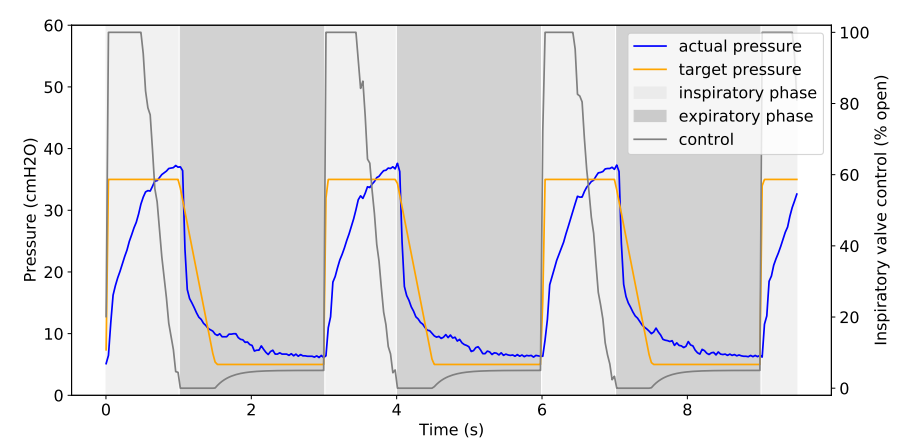

PID áp dụng bộ điều khiển tuyến tính với hệ số tỉ lệ (P- proportional), tích phân (I- integral) và vi phân (D- differential coefficients).

Loại điều khiển này hiện là tiêu chuẩn ngành cho điều khiển máy thở.

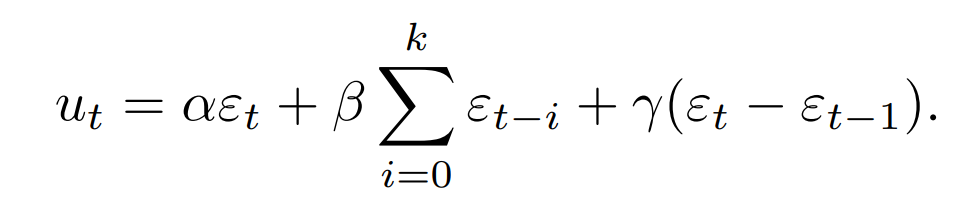

#### 3.3.1. P Controller:

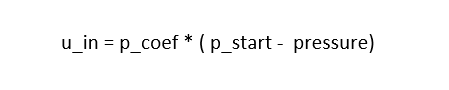

Ở tập dữ liệu huấn luyện, chúng ta đã có u_in và pressure, sử dụng hồi quy tuyến tính  để tìm các giá trị của p_coef và p_start, ta thu được:
- p_coef có thể nhận giá trị thuộc [0,01, 0,1, 0,2, 0,3, 0,4, 0,5, 0,6, 0,7, 0,8, 0,9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- p_star có thể nhận giá trị thuộc [10, 15, 20, 25, 30, 35].

Cảm biến áp suất luôn cung cấp một trong 950 phép đo áp suất riêng biệt, vì vậy ta có thể áp dụng thuật toán sau để xác định p_coef và p_star trong trường hợp hồi quy tuyến tính không phù hợp:

In [ ]:
def find_p_coefficients(u):
        for i in [0, len(u) // 3, len(u) * 2 // 3, len(u) - 1]:
            if u[i] != 0 and u[i] != 100:
                for p_coef in [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
                    for p_star in [10, 15, 20, 25, 30, 35]:
                        predicted_p_int = (p_star - u[i] / p_coef - p_min) / p_step
                        if predicted_p_int >= 0 and predicted_p_int < len(p_values) and is_integer(predicted_p_int):
                          # nếu predicted_p_int tìm được thuộc 950 giá trị rời rạc mà cảm biến áp suất đo được
                          # thì p_coef, p_star được lấy ( chấp nhân predicted_p_int khi sai số rất nhỏ)
                            return p_coef, p_star
        return None, None

#### 3.3.2. PI Controller:

PI Controller sẽ phức tạp 2 vì nó có thêm 2 tham số i_coef và T

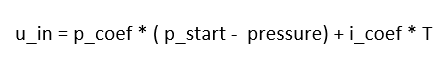

p_coef và p_start có thể được xác định bằng hồi quy tuyến tính, nhưng T thì không. Tác giả đã điều chỉnh T theo cách thủ công cho đến khi T = 0,5 thì hồi quy tuyến tính cho các tham số khác phù hợp nhất (ngoài ra các tác giả của solution khác cũng nhận thấy T=0,5).

In [ ]:

T= 0,5
def find_pi_coefficients(u, dt, p_values_to_try):
        while len(u) >= 3 and (u[0] == 0 or u[0] == 100 or u[1] == 0 or u[1] == 100 or u[2] == 0 or u[2] == 100):
            u = u[1:]
        if len(u) < 3: return None, None, None, None, None
        p_stars = np.array([10, 15, 20, 25, 30, 35])
        found = False
        s0 = dt[0] / (dt[0] + T)
        s1 = dt[1] / (dt[1] + T)
        for p_0 in p_values_to_try:
            for p_coef in [0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
                for i_coef in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
                    if p_coef == 0 and i_coef == 0: continue
                    q_0 = (u[0] + p_coef * (p_0 - p_stars)) / i_coef
                    pis = p_coef + i_coef * s0
                    p_1 = (pis * p_stars + i_coef * (1-s0) * q_0 - u[1]) / pis 
                    ii = is_integer((p_1 - p_min) / p_step)
                    if not ii.any(): continue
                    if ii.sum() > 1: print("More than one ***********")
                    p_star = p_stars[ii.argmax()]
                    p_1 = p_1[ii.argmax()] 
                    q_1 = (1-s0) * q_0[ii.argmax()] + s0 * (p_star - p_1) 
                    pis = p_coef + i_coef * s1
                    p_2 = (pis * p_star + i_coef * (1-s1) * q_1 - u[2]) / pis
                    if not is_integer((p_2 - p_min) / p_step): continue
                    if np.abs(p_1 - p_2) < 1e-10: print('p_1 == p_2', p_0, p_1, p_2, p_coef, i_coef, p_star); return None, None, None, None, None
                    found = True
                    break
                if found: break
            if found: break
        if not found: return None, None, None, None, None
        return p_0, p_coef, i_coef, p_star, q_0[ii.argmax()]

Ban đầu, vì có 4 vòng lặp nên thuật toán chạy khá chậm, tác giả đưa 3 ý tưởng để cải tiến thời gian chạy của thuật toán:
- Các giá trị của p [0] được tìm kiếm theo thứ tự tần suất giảm dần. Áp suất ban đầu thường là khoảng 6, vì vậy tác giả bắt đầu tìm kiếm ở đó (thay vì tìm theo thứ tự của 950 giá trị ban đầu)
- Vòng lặp trong cùng có thể được vectơ hóa bằng cách đặt tất cả các giá trị p_star vào một mảng numpy và sử dụng các phép toán ma trận.
- Các nhịp thở là độc lập, chúng ta có thể thực hiện song song các nhịp thở cho các CPU khác nhau.

#### 3.3.3. PID Controller:

Tác giả chưa áp dụng D (differential coefficients) vào lời giải.

## 4. Nhìn lại quá trình làm đồ án:

### 4.1. Nguyễn Hoàng Sơn:

- Khó khăn:
    + 
    +
    +

- Học được:
    + 
    +
    +

### 4.2. Nguyễn Văn Hậu:

- Khó khăn:
    + 
    +
    +

- Học được:
    + 
    +
    +

### 4.3. Nguyễn Đình Tuyên:

- Khó khăn:
    + 
    +
    +

- Học được:
    + 
    +
    +

### 4.4. Nhóm:

- Khó khăn:
    + 
    +
    +

- Nếu có thêm thời gian, nhóm sẽ cố gắng thực hiện:
    + 
    +
    +

## 5. Tài liệu tham khảo:

Để hoàn thành đồ án này, nhóm mình đã tham khảo những tài liệu sau:
1. https://quantri.nhidong.org.vn/Data/bvnhidong/bvnhidong/Attachments/2019_3/07_theo_doi_benh_nhan_tho_may_-_2015-04_263201916.pdf
2. https://arxiv.org/pdf/2102.06779.pdf